In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c9185c03b56d15ae8863cd6b452e190


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colchester
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | bontang
Processing Record 5 of Set 1 | shakawe
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | roscommon
Processing Record 8 of Set 1 | mulanje
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pingliang
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | tokur
Processing Record 18 of Set 1 | huarmey
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | barrow
Processing Reco

Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | praia
Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | alfreton
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | atar
Processing Record 45 of Set 4 | swellendam
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | monrovia
Processing Record 1 of Set 5 | vieux-habitants
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | whitehorse
Processing Record 4 of Set 5 | northam
Processing Record 5 of Set 5 | dalvik
Processing Record 6 of Set 5 | port hawkesbury
Processing Record 7 of Set 5 | zhob
Processing Record 8 of Set 5 | manaus
Processing Record 9 of Set 5 | bedele
Processing Record 10 of Set 5 |

Processing Record 29 of Set 8 | estevan
Processing Record 30 of Set 8 | tchamba
Processing Record 31 of Set 8 | fatehpur
Processing Record 32 of Set 8 | pemberton
Processing Record 33 of Set 8 | vikhorevka
Processing Record 34 of Set 8 | pancas
Processing Record 35 of Set 8 | chagda
City not found. Skipping...
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | sobral
Processing Record 38 of Set 8 | iset
Processing Record 39 of Set 8 | yankton
Processing Record 40 of Set 8 | baoqing
Processing Record 41 of Set 8 | tabuk
Processing Record 42 of Set 8 | shyroke
Processing Record 43 of Set 8 | klyuchi
Processing Record 44 of Set 8 | turukhansk
Processing Record 45 of Set 8 | methven
Processing Record 46 of Set 8 | zhangzhou
Processing Record 47 of Set 8 | lamar
Processing Record 48 of Set 8 | ikorodu
Processing Record 49 of Set 8 | chapais
Processing Record 50 of Set 8 | key largo
Processing Record 1 of Set 9 | damaturu
Processing Record 2 of Set 9 | harlingen
Processi

Processing Record 20 of Set 12 | rio de janeiro
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | kurilsk
Processing Record 23 of Set 12 | jiazi
Processing Record 24 of Set 12 | ambon
Processing Record 25 of Set 12 | zaysan
Processing Record 26 of Set 12 | bud
Processing Record 27 of Set 12 | aquiraz
Processing Record 28 of Set 12 | ibra
Processing Record 29 of Set 12 | boissevain
Processing Record 30 of Set 12 | chino valley
Processing Record 31 of Set 12 | olafsvik
Processing Record 32 of Set 12 | svobodnyy
Processing Record 33 of Set 12 | portree
Processing Record 34 of Set 12 | moss point
Processing Record 35 of Set 12 | souillac
Processing Record 36 of Set 12 | mykolayivka
Processing Record 37 of Set 12 | mayumba
Processing Record 38 of Set 12 | ulladulla
Processing Record 39 of Set 12 | ozernovskiy
Processing Record 40 of Set 12 | vangaindrano
Processing Record 41 of Set 12 | bolotnoye
Processing Record 42 of Set 12 | minas de barroteran
Processing Reco

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Colchester,51.89,0.90,53.01,100,75,5.82,GB,2020-10-06 06:45:57
1,Tuktoyaktuk,69.45,-133.04,33.76,95,100,16.51,CA,2020-10-06 06:45:57
2,Bontang,0.13,117.50,83.35,78,57,8.77,ID,2020-10-06 06:45:57
3,Shakawe,-18.37,21.85,86.63,21,0,5.86,BW,2020-10-06 06:45:58
4,Upernavik,72.79,-56.15,21.29,82,5,4.94,GL,2020-10-06 06:45:58
5,Roscommon,53.63,-8.18,51.01,99,100,13.00,IE,2020-10-06 06:45:58
6,Mulanje,-16.03,35.50,71.60,78,75,5.82,MW,2020-10-06 06:45:58
7,Jamestown,42.10,-79.24,43.00,87,1,6.93,US,2020-10-06 06:45:12
8,Ushuaia,-54.80,-68.30,41.00,52,20,4.70,AR,2020-10-06 06:41:01
9,Hithadhoo,-0.60,73.08,82.31,74,100,8.97,MV,2020-10-06 06:45:58


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Colchester,GB,2020-10-06 06:45:57,51.89,0.90,53.01,100,75,5.82
1,Tuktoyaktuk,CA,2020-10-06 06:45:57,69.45,-133.04,33.76,95,100,16.51
2,Bontang,ID,2020-10-06 06:45:57,0.13,117.50,83.35,78,57,8.77
3,Shakawe,BW,2020-10-06 06:45:58,-18.37,21.85,86.63,21,0,5.86
4,Upernavik,GL,2020-10-06 06:45:58,72.79,-56.15,21.29,82,5,4.94
...,...,...,...,...,...,...,...,...,...
555,Puerto Carreno,CO,2020-10-06 06:47:10,6.19,-67.49,74.68,90,100,4.34
556,Bantry,IE,2020-10-06 06:47:10,51.68,-9.45,51.80,93,75,9.17
557,Khovu-Aksy,RU,2020-10-06 06:47:10,51.13,93.60,47.88,50,100,9.06
558,Peniche,PT,2020-10-06 06:47:10,39.36,-9.38,64.99,94,96,3.65


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

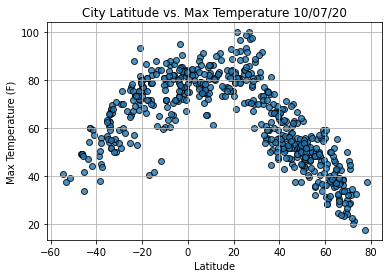

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

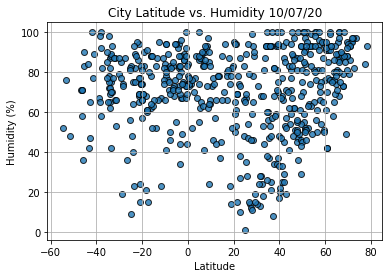

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

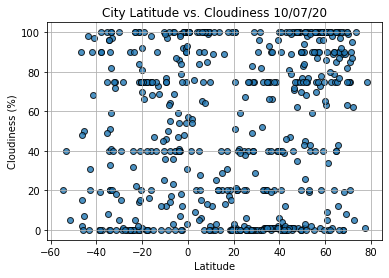

In [23]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

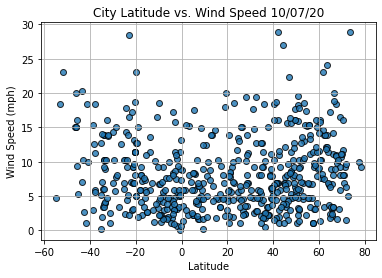

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()